In [ ]:
from google.colab import drive
import os
import sys
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Concatenate, BatchNormalization, SimpleRNNCell, RNN, SimpleRNN, LSTM, Embedding, Bidirectional, TimeDistributed, Conv1D, Conv2D, MaxPool1D, MaxPool2D, GlobalMaxPool1D, GlobalMaxPool2D, AveragePooling1D, AveragePooling2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import Input, Model, Sequential
from sklearn.model_selection import train_test_split

drive.mount("/content/drive", force_remount=True)
try:
    my_path = "/content/notebooks"
    os.symlink("/content/drive/MyDrive/ColabNotebooks/my_env", my_path)
    sys.path.insert(0, my_path)
except:
    pass
os.chdir(my_path)

def set_css():
  display(HTML("""
  <style>
    pre {white-space: pre-wrap;}
  </style>
  """))
get_ipython().events.register("pre_run_cell", set_css)

plt.style.use("dark_background")

Mounted at /content/drive


In [ ]:
(x_tr, y_tr), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_tr, x_val, y_tr, y_val = train_test_split(x_tr, y_tr, train_size=0.8, shuffle=True, random_state=777)

print(x_tr.shape, y_tr.shape)

(40000, 32, 32, 3) (40000, 1)


In [ ]:
model = Sequential()
model.add(Conv2D(filters=96, kernel_size=(11, 11), strides=(4, 4), activation="relu", input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation="relu", padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(units=4096, activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["sparse_categorical_accuracy"])

model.summary()

ValueError: ignored

https://stackoverrun.com/ko/q/11696058

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 96)        2688      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 384)         8

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
train_datagen.fit(train_images)
validation_datagen.fit(validation_images)

https://www.geeksforgeeks.org/keras-fit-and-keras-fit_generator/

In [ ]:
history = model.fit_generator(train_datagen.flow(train_images,train_labels, batch_size = 32), 
                    validation_data = validation_datagen.flow(validation_images, validation_labels, batch_size = 32),
                    epochs = 10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1547/1547 [==============================] - 63s 20ms/step - loss: 2.1867 - accuracy: 0.3433 - val_loss: 1.6553 - val_accuracy: 0.4460
Epoch 2/10
1547/1547 [==============================] - 30s 19ms/step - loss: 1.2675 - accuracy: 0.5611 - val_loss: 1.2658 - val_accuracy: 0.5740
Epoch 3/10
1547/1547 [==============================] - 30s 19ms/step - loss: 1.0699 - accuracy: 0.6324 - val_loss: 1.0824 - val_accuracy: 0.6100
Epoch 4/10
1547/1547 [==============================] - 30s 19ms/step - loss: 0.9309 - accuracy: 0.6861 - val_loss: 1.0452 - val_accuracy: 0.6220
Epoch 5/10
1547/1547 [==============================] - 30s 19ms/step - loss: 0.8295 - accuracy: 0.7181 - val_loss: 0.8821 - val_accuracy: 0.6980
Epoch 6/10
1547/1547 [==============================] - 30s 19ms/step - loss: 0.7661 - accuracy: 0.7429 - val_loss: 0.7978 - val_accuracy: 0.7240
Epoch 7/10
1547/1547 [==============================] - 30s 19ms/step - loss: 0.7499 - accuracy: 0.7464 - val_loss: 0.7609 -

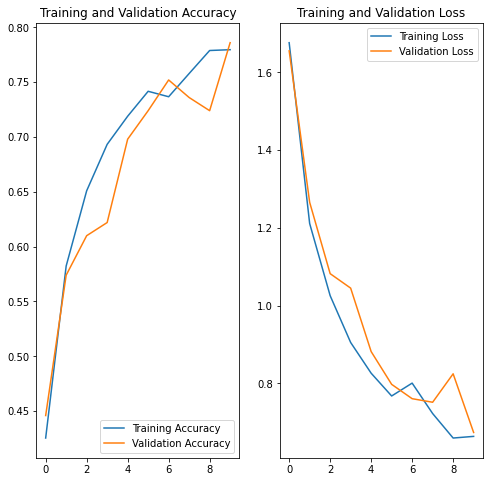

In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()